In [1]:
import numpy as np
import hdf5storage
from utils.tuning_curve_utils import *

data_path = './dataset/indy_20161005_06.mat'

matdata = hdf5storage.loadmat(data_path)
ch_names = matdata['chan_names']
cur_pos = matdata['cursor_pos']
fin_pos = matdata['finger_pos']
spks = matdata['spikes']
t_stamps = matdata['t']
tar_pos = matdata['target_pos']

In [2]:
cur_angle = cal_cur_angle(cur_pos)

In [3]:
x_axis, intervals = generate_intervals(interval_num=12, width=5)

In [4]:
print(x_axis)
print(intervals)

[  0  30  60  90 120 150 180 210 240 270 300 330]
[[-5, 5], [25, 35], [55, 65], [85, 95], [115, 125], [145, 155], [175, 185], [205, 215], [235, 245], [265, 275], [295, 305], [325, 335]]


In [5]:
corr_times = split_angles(intervals, cur_angle, t_stamps)

In [6]:
original_spikes_num_ratio = cal_spikes_num_ratio(len(intervals), 100, 2000, spks, corr_times, t_stamps)

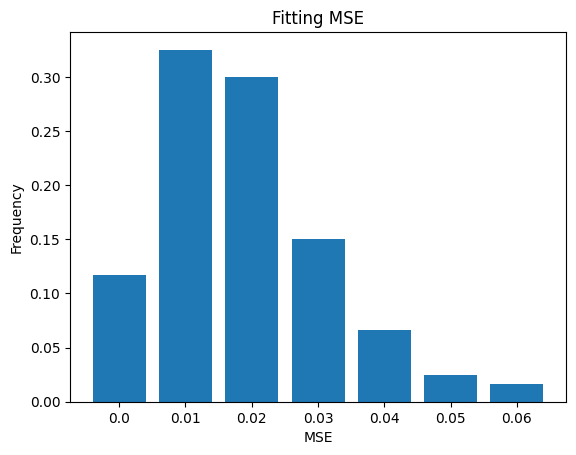

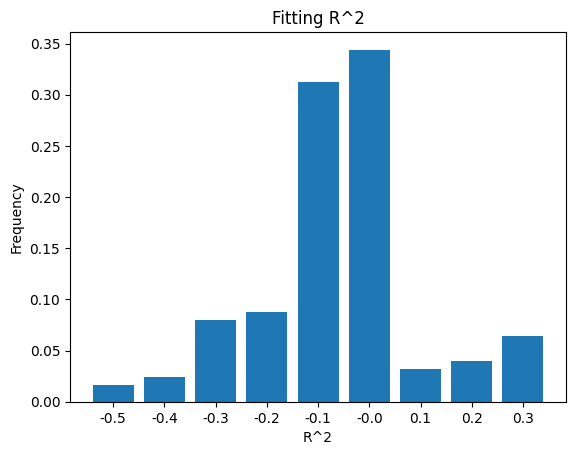

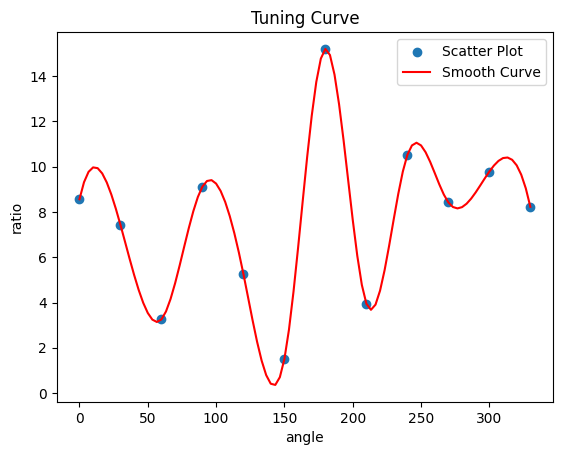

In [7]:
analysis_fit_tuning_curve(100, np.inf, spks, corr_times, t_stamps, original_spikes_num_ratio)
plot_tuning_curve(x_axis, original_spikes_num_ratio)